In [1]:
!pip install fbprophet

  Using cached https://files.pythonhosted.org/packages/33/fb/ad98d46773929079657706e6b2b6e366ba6c282bc2397d8f9b0ea8e5614c/fbprophet-0.5.tar.gz
  Using cached https://files.pythonhosted.org/packages/01/fd/568f439331b7811a18367ea0f99289417fe3e8711848950e571d340cbad0/pystan-2.19.0.0-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/4e/7e/377a3cbba646ec0cf79433ef858881d809a3b87eb887b0901cb83c66a758/lunardate-0.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/74/83/d0fa07078f4d4ae473a89d7d521aafc66d82641ea0af0ef04a47052e8f17/convertdate-2.1.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/05/97/dd99fa9c0d9627a7b3c103a00f1566d8193aca8d473884ed258cca82b06f/setuptools_git-1.2-py2.py3-none-any.whl
  Complete output from command /Users/bassim/anaconda3/bin/python -u -c "import setuptools, tokenize;__file__='/private/var/folders/

In [2]:
# dependencies

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from fbprophet import Prophet
import math
from tqdm import tqdm_notebook as tqdm
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
%matplotlib inline

/Users/bassim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# read files

inp = pd.read_csv('input.csv')
form = pd.read_csv('output.csv')

In [4]:
# Preprocess data

'''
input: raw csv files of input data and the rows for prediction from the output template
output: preprocessed data that only has rows that need to be forecasted for the challenge
output has columns that represent dates in year-month-day format.
'''

def preprocess(inp,form):
    form = form[[x for x in form.columns[:6]]]
    header_form = [x for x in form.iloc[1]]
    form = form[2:]
    form.columns = header_form
    cal = dict((v,k) for k,v in enumerate(calendar.month_abbr))
    cal['March'] = 3
    cal['April'] = 4
    months = [x for x in inp.iloc[1][8:]]
    date_comp = []
    for date,month in zip(inp.columns[8:],months):
        date_comp.append('20' + date.split('.')[0].split('/')[0]+'-'+str(cal[month])+'-1')
    unique_cols = date_comp
    header = inp.iloc[1]
    inp = inp[2:] 
    inp.columns = header
    inp.columns = [x for x in inp.columns[:8]] + unique_cols
    train = pd.merge(form, inp, on=[x for x in form.columns], how='inner')
    return train

In [5]:
train = preprocess(inp,form)
train.head(2)

Generic Group Generic Brand Generic Product Category Generic Product   \
0       Group 2       Brand 1       Product Category 1        Product 2   
1       Group 2       Brand 1       Product Category 1      Product 1.1   

  Generic Variable Units Generic Sub-Variable  \
0     Opening Base   NaN  Intentionally Blanc   
1     Opening Base   NaN  Intentionally Blanc   

                                   Generic LookupKey     2014-4-1  \
0  Group 2Brand 1Product Category 1Product 2Openi...   2096925.17   
1  Group 2Brand 1Product Category 1Product 1.1Ope...  2559217.412   

      2014-5-1  ... 2024-7-1 2024-8-1 2024-9-1 2024-10-1 2024-11-1 2024-12-1  \
0  2217372.518  ...      NaN      NaN      NaN       NaN       NaN       NaN   
1  2566190.476  ...      NaN      NaN      NaN       NaN       NaN       NaN   

  2024-1-1 2024-2-1 2024-3-1 2025-4-1  
0      NaN      NaN      NaN      NaN  
1      NaN      NaN      NaN      NaN  

[2 rows x 141 columns]

In [9]:
# plots forecasts and seasonality trends

'''
input: generic lookup key
output: plots of forecasts and seasonality

'''

def plot(lookup):
    df = pd.DataFrame()
    df['ds'] = [x for x in train[train['Generic LookupKey']==lookup].iloc[:,8:].columns]
    df['y'] = train[train['Generic LookupKey']==lookup].iloc[:,8:].values.tolist()[0]
    df = df.dropna()
    d = {}
    for key,val in zip(df['ds'],df['y']):
        d[key] = val
    df['ds'] = sorted(df['ds'], key=lambda d: tuple(map(int, d.split('-'))))
    df['y'] = [d[key] for key in df['ds']]
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=40,freq='M')
    forecast = m.predict(future)
    m.plot(forecast)
    #m.plot_components(forecast)
    plt.show()

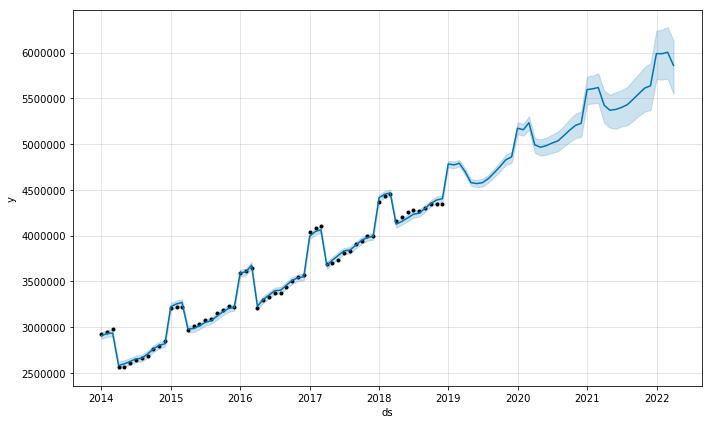

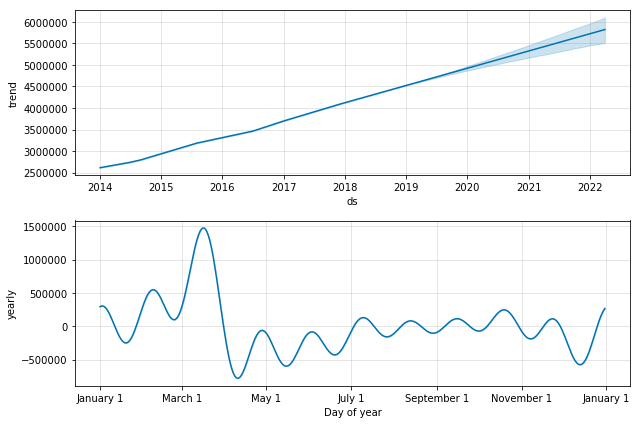

In [33]:
# example

plot('Group 2Brand 1Product Category 1Product 1.1Opening Base')

Group 2Brand 1Product Category 1Product 2Opening Base 0


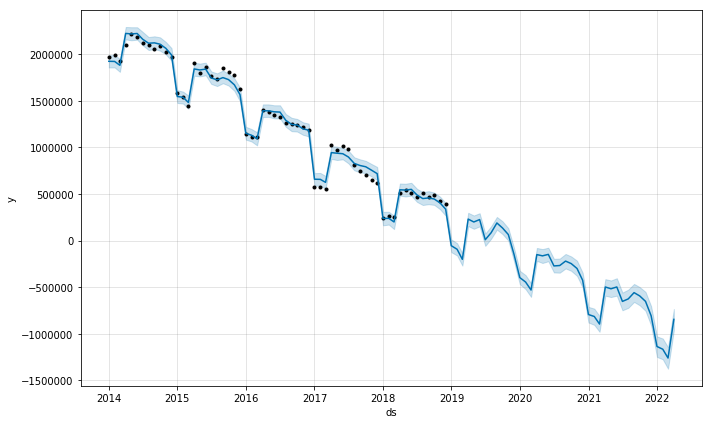

Group 2Brand 1Product Category 1Product 1.1Opening Base 1


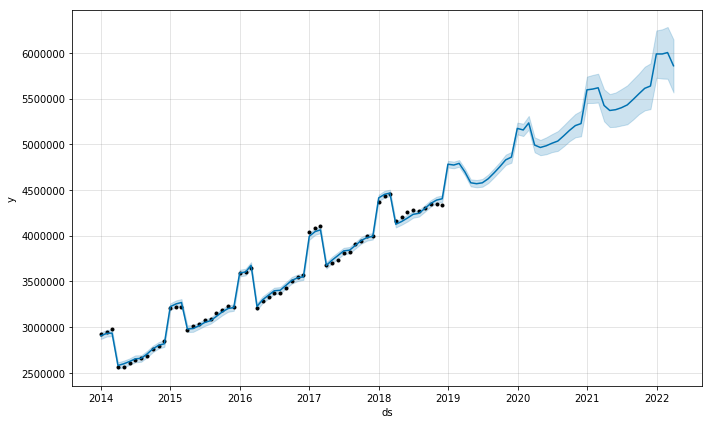

Group 2Brand 1Product Category 1Product 1.2Opening Base 2


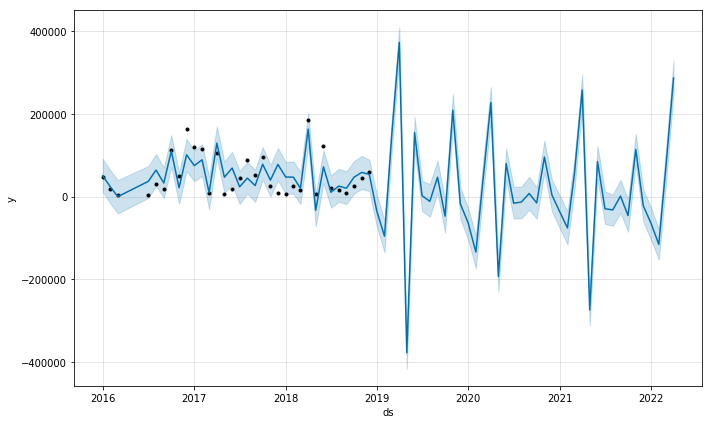

Group 2Brand 1Product Category 2Product 10Opening Base 3


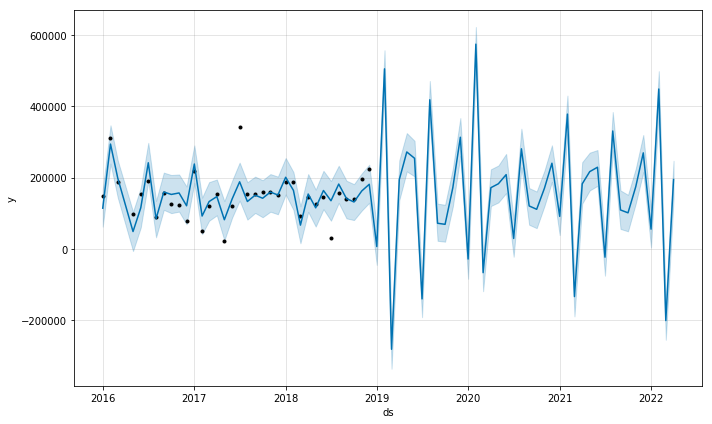

Group 2Brand 1Product Category 2Product 6Opening Base 4


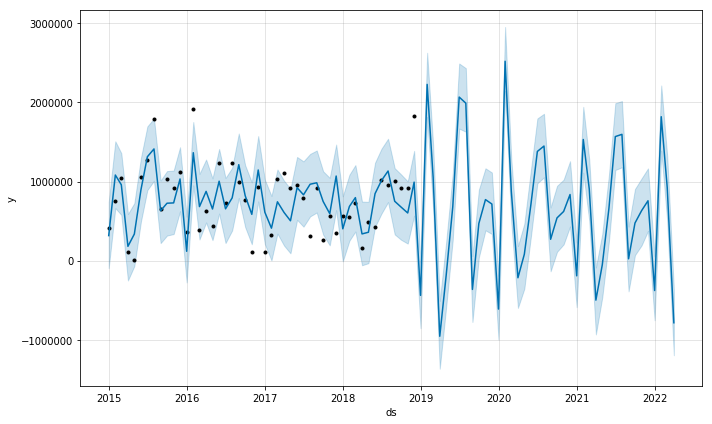

Group 5Brand 1Product Category 1Product 2Opening Base 5


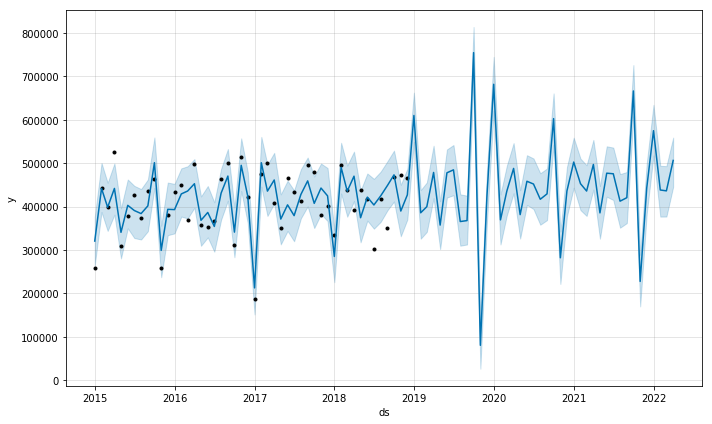

Group 5Brand 1Product Category 1Product 1.1Opening Base 6


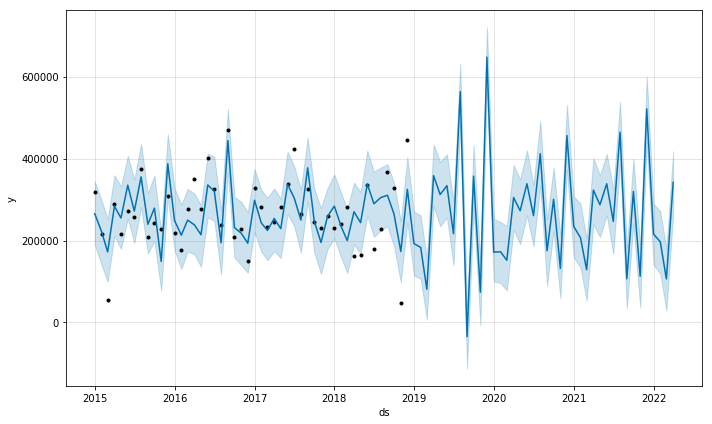

Group 5Brand 1Product Category 1Product 1.2Opening Base 7


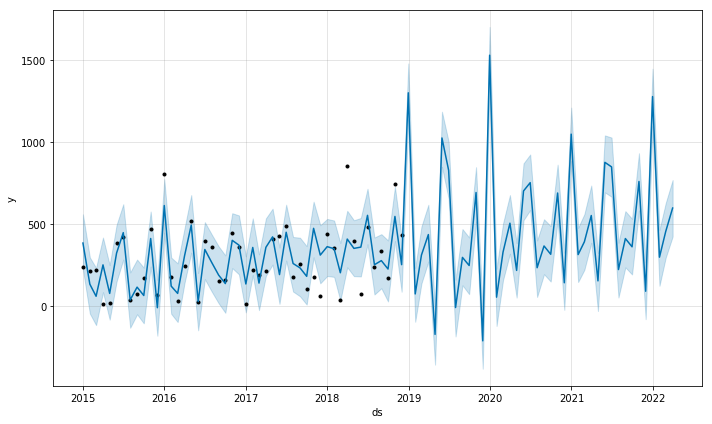

Group 2Brand 2Product Category 2Product 10Opening Base 8


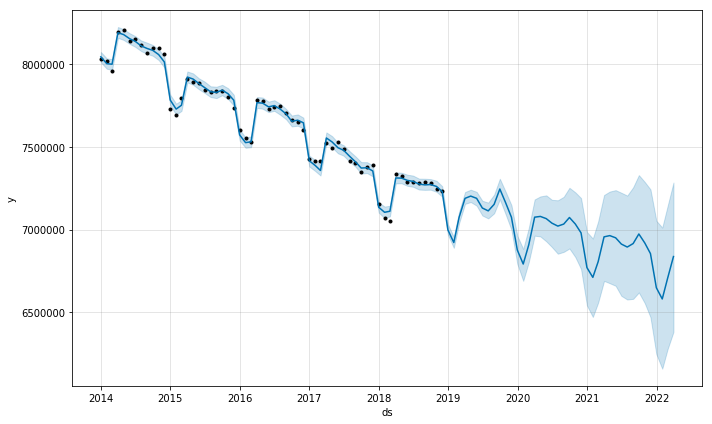

Group 2Brand 2Product Category 2Product 6Opening Base 9


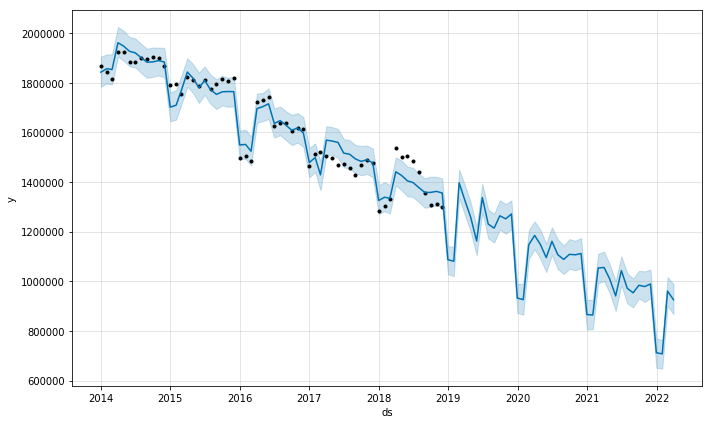

Group 5Brand 2Product Category 2Product 10Opening Base 10


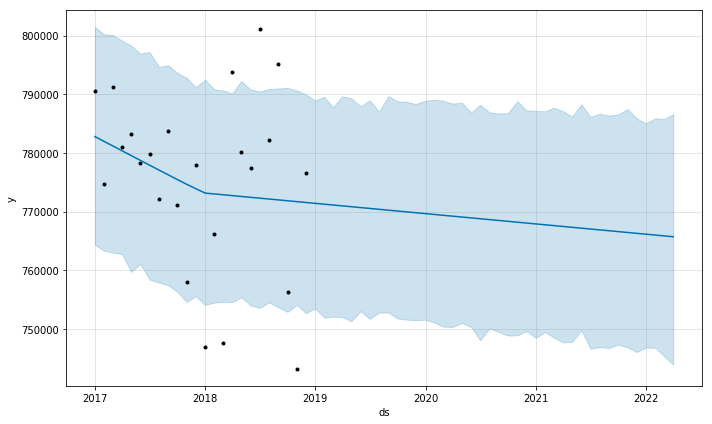

Group 5Brand 2Product Category 2Product 6Opening Base 11


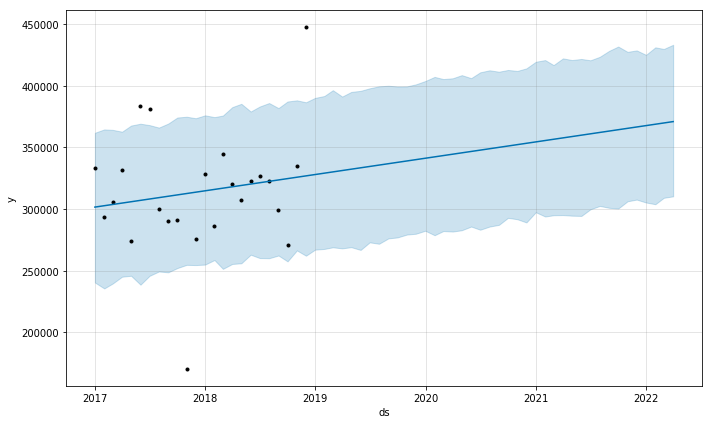

Group 2Brand 4Product Category 2Product 10Opening Base 12


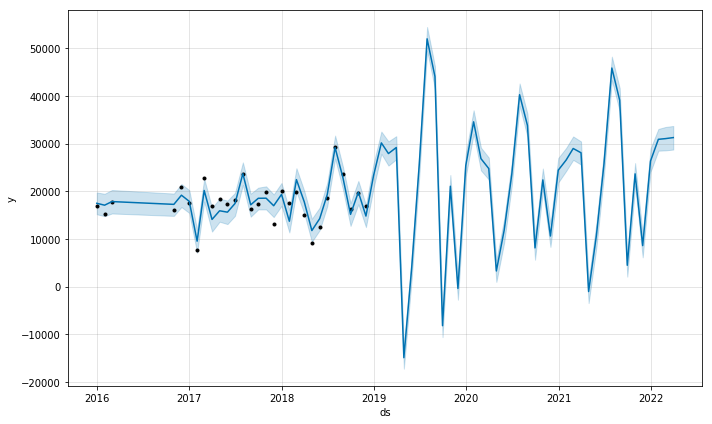

Group 2Brand 4Product Category 2Product 6Opening Base 13


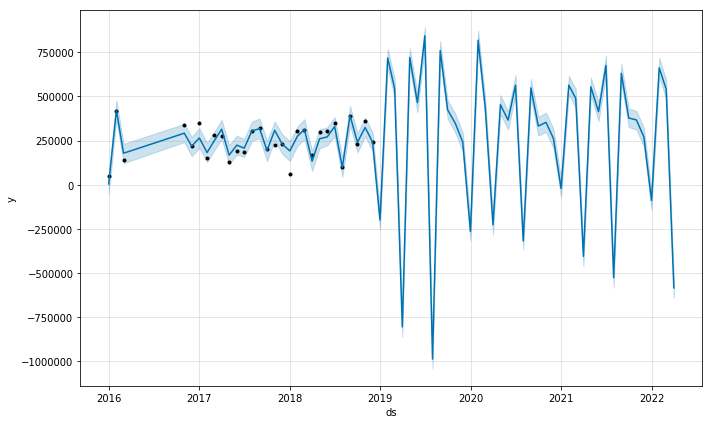

Group 2Brand 1Product Category 1Product 2Closing Base 14


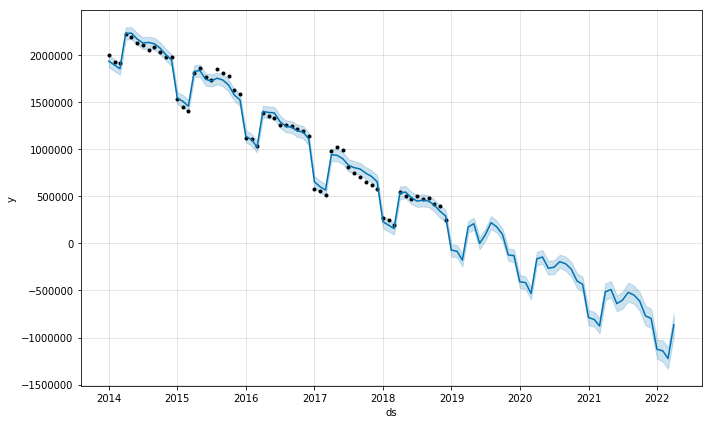

Group 2Brand 1Product Category 1Product 1.1Closing Base 15


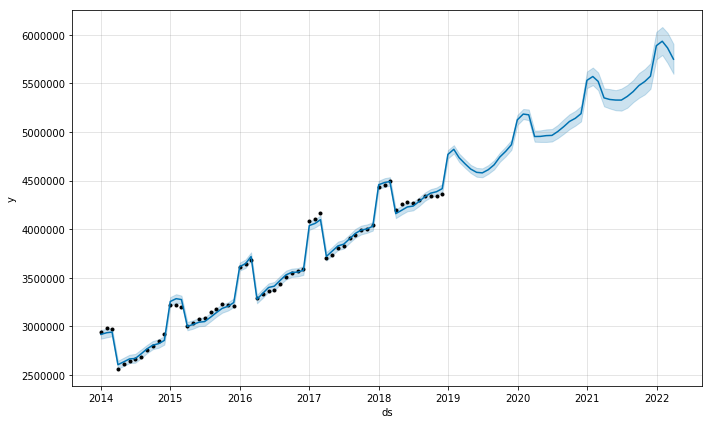

Group 2Brand 1Product Category 1Product 1.2Closing Base 16


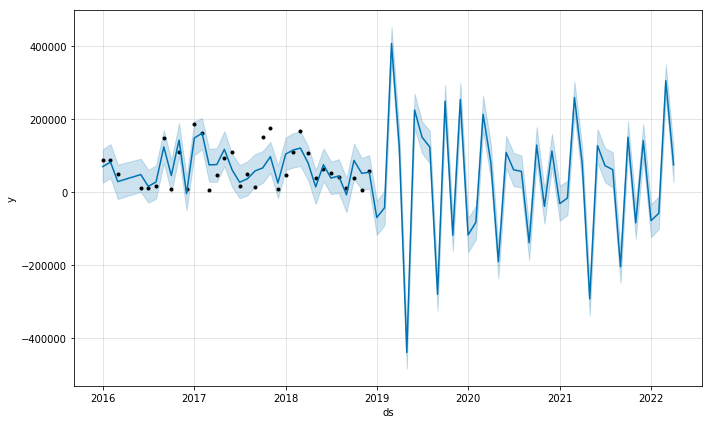

Group 2Brand 1Product Category 2Product 10Closing Base 17


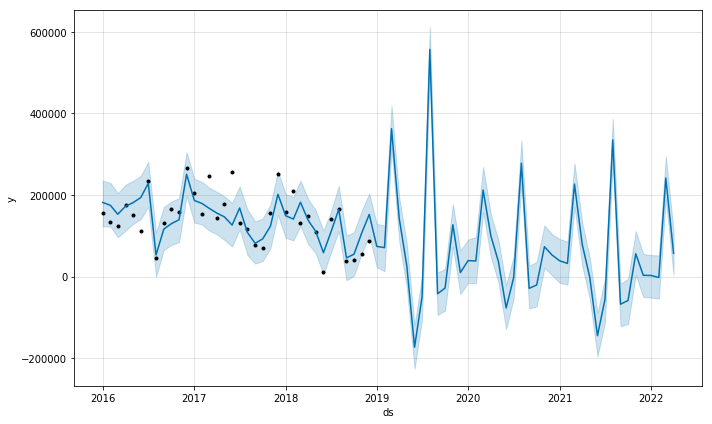

Group 2Brand 1Product Category 2Product 6Closing Base 18


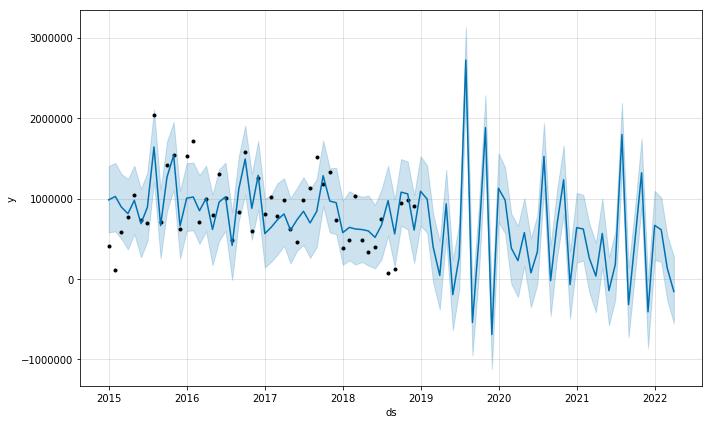

Group 5Brand 1Product Category 1Product 1.1Closing Base 19


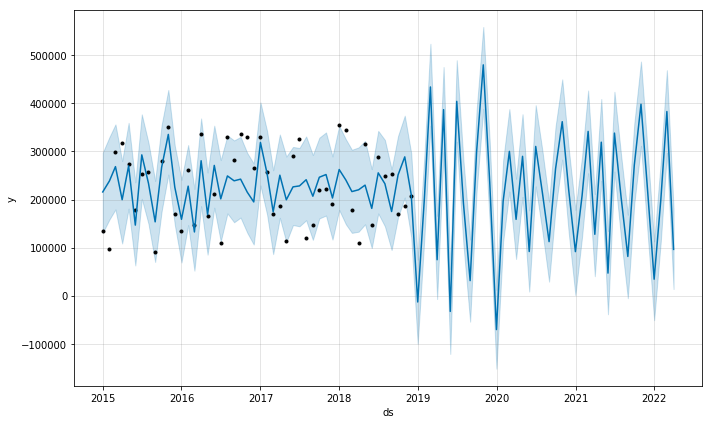

Group 5Brand 1Product Category 1Product 1.2Closing Base 20


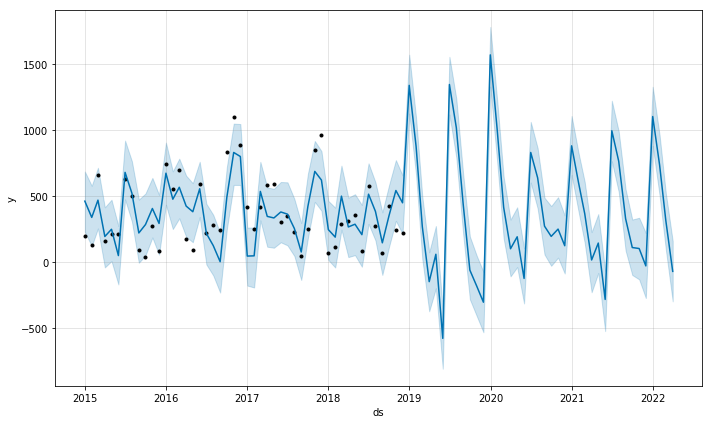

Group 2Brand 2Product Category 2Product 10Closing Base 21


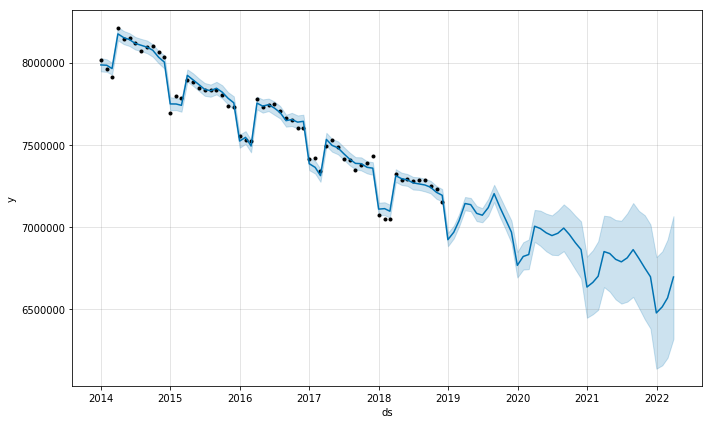

Group 2Brand 2Product Category 2Product 6Closing Base 22


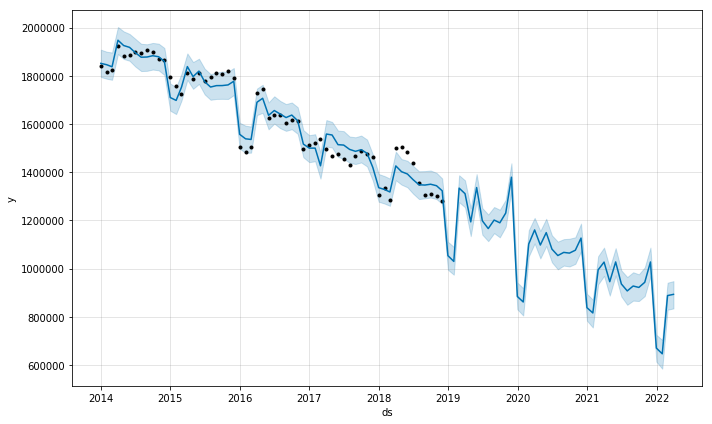

Group 5Brand 2Product Category 2Product 10Closing Base 23


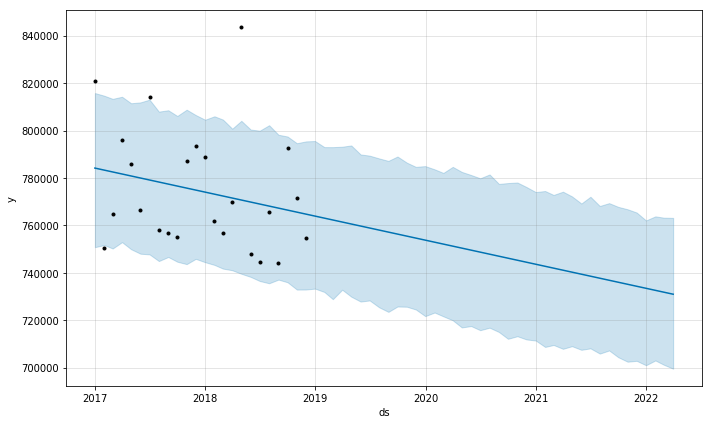

Group 5Brand 2Product Category 2Product 6Closing Base 24


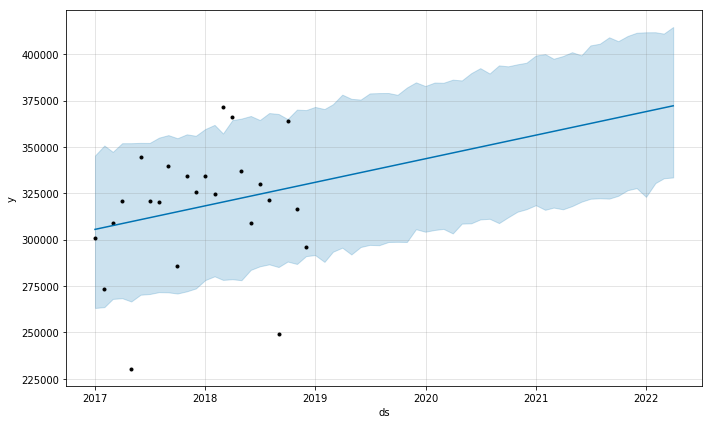

Group 2Brand 4Product Category 2Product 10Closing Base 25


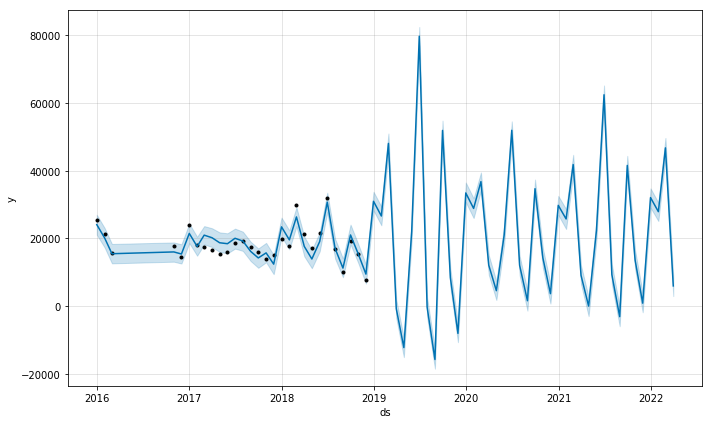

Group 2Brand 4Product Category 2Product 6Closing Base 26


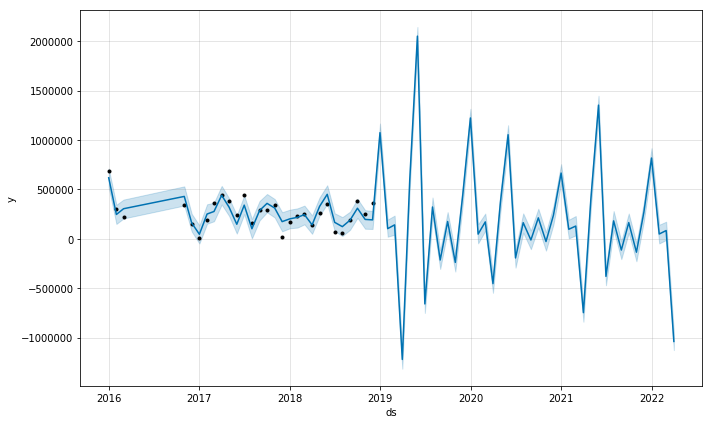

Group 2Brand 1Product Category 1Product 2Leavers 27


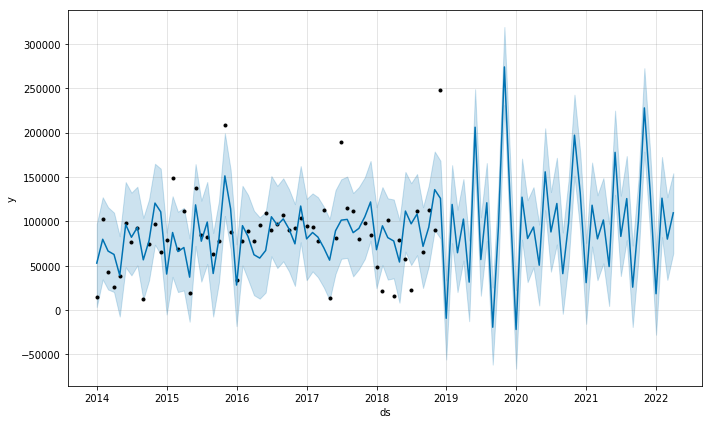

Group 2Brand 1Product Category 1Product 1.1Leavers 28


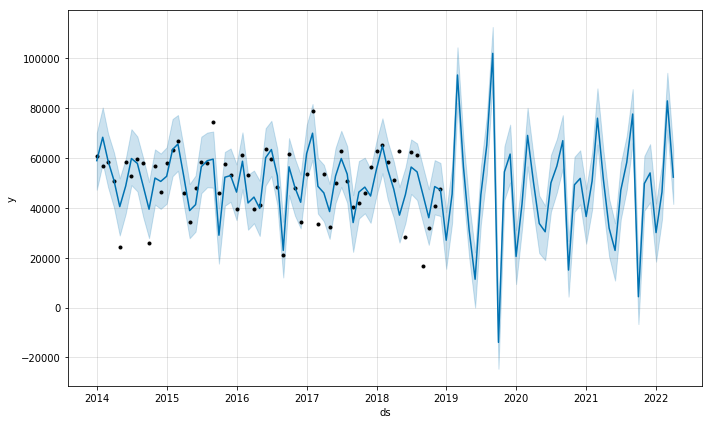

Group 2Brand 1Product Category 1Product 1.2Leavers 29


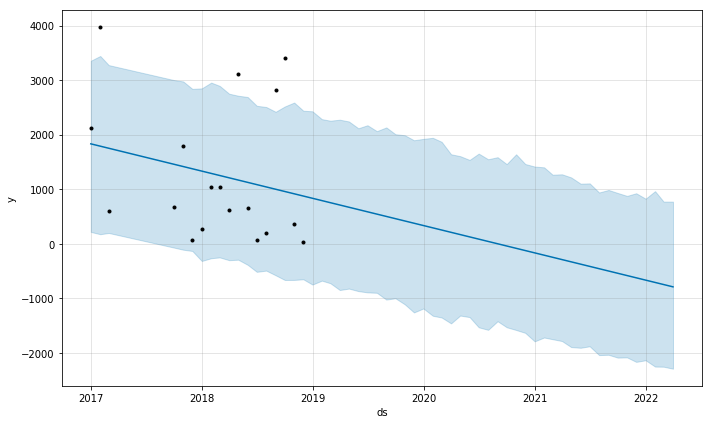

Group 2Brand 1Product Category 2Product 10Leavers 30


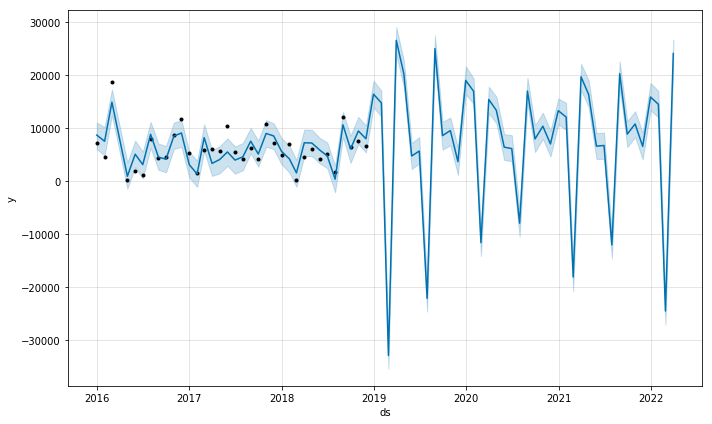

Group 2Brand 1Product Category 2Product 6Leavers 31


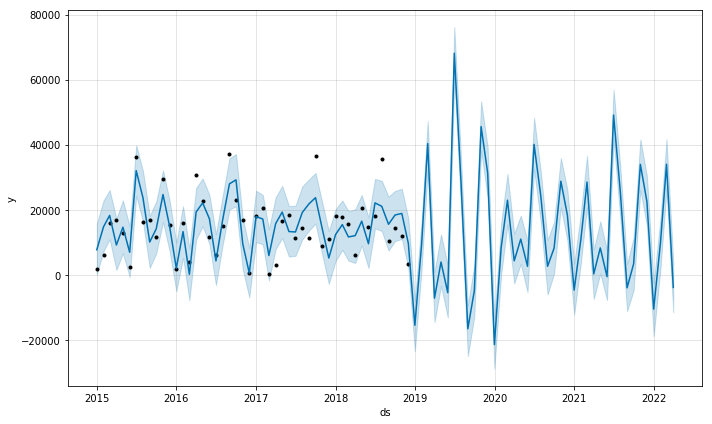

Group 5Brand 1Product Category 1Product 2Leavers 32


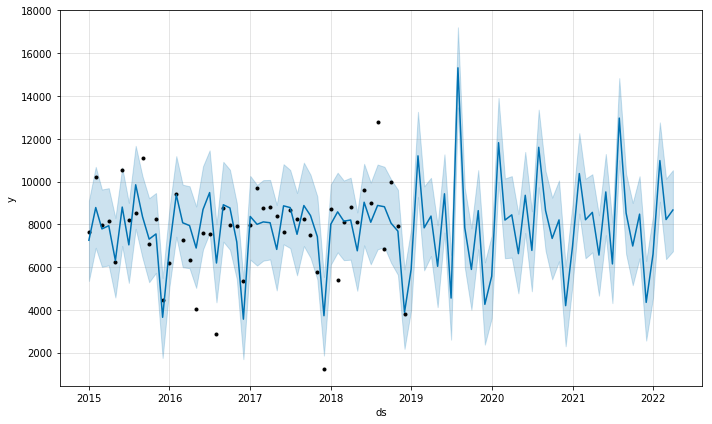

Group 5Brand 1Product Category 1Product 1.1Leavers 33


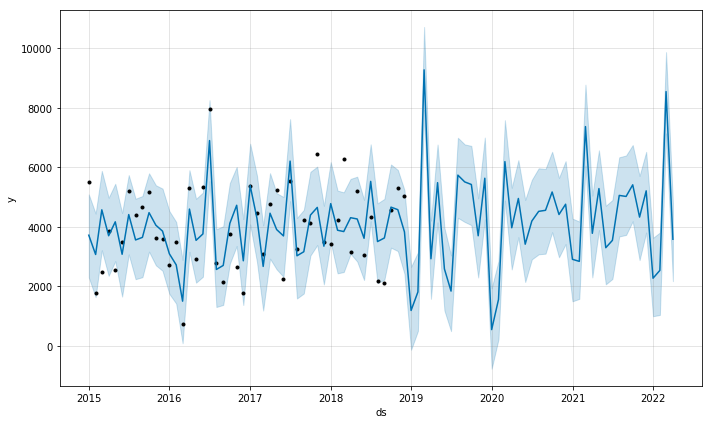

Group 5Brand 1Product Category 1Product 1.2Leavers 34


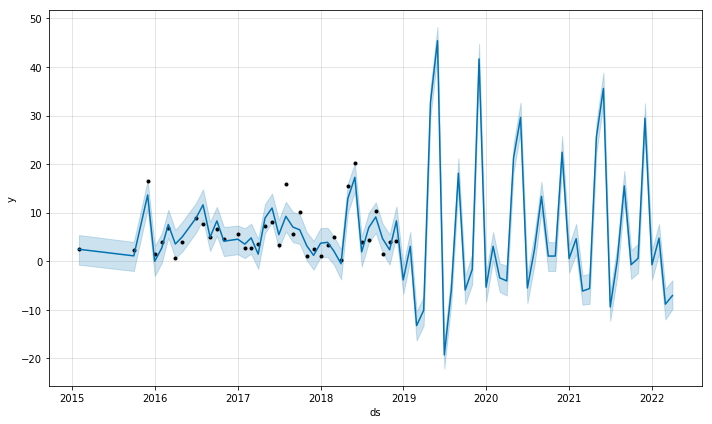

Group 2Brand 2Product Category 2Product 10Leavers 35


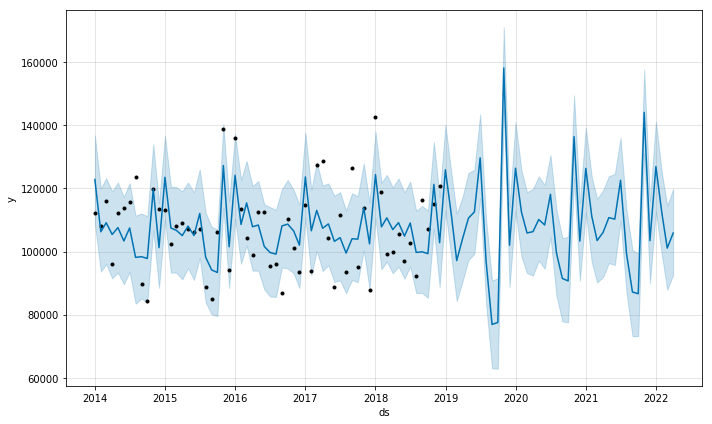

Group 2Brand 2Product Category 2Product 6Leavers 36


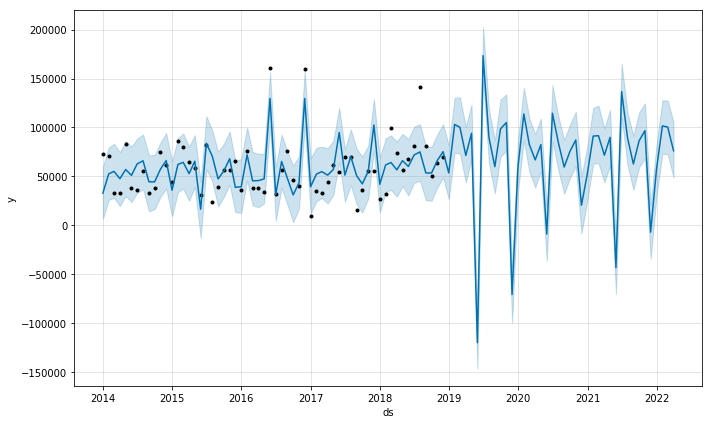

Group 5Brand 2Product Category 2Product 10Leavers 37


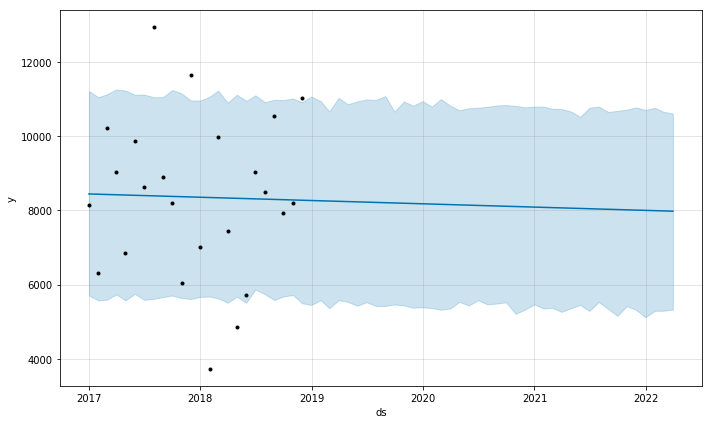

Group 5Brand 2Product Category 2Product 6Leavers 38


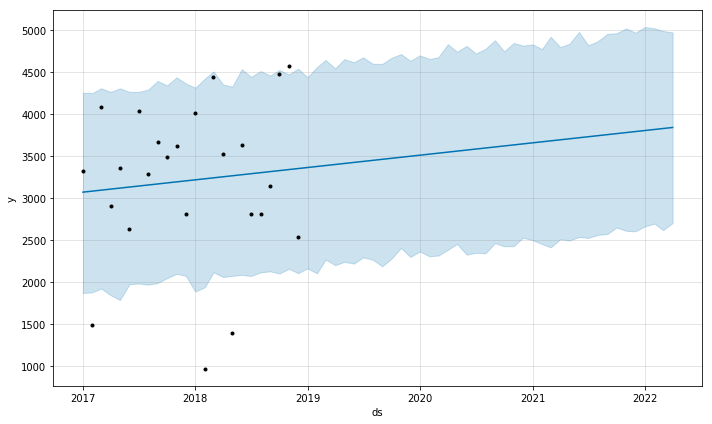

Group 2Brand 4Product Category 2Product 10Leavers 39


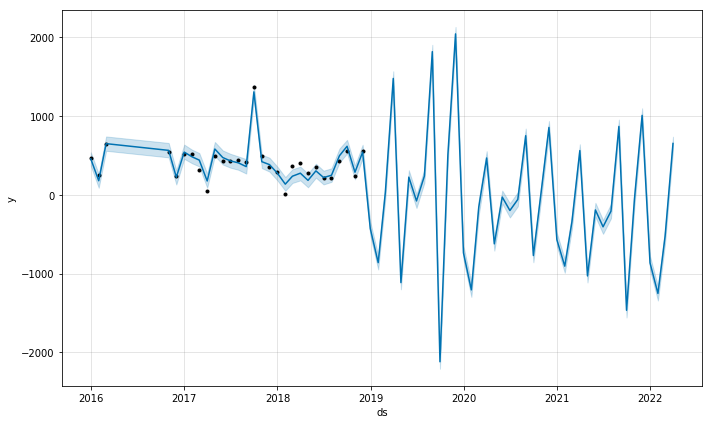

Group 2Brand 4Product Category 2Product 6Leavers 40


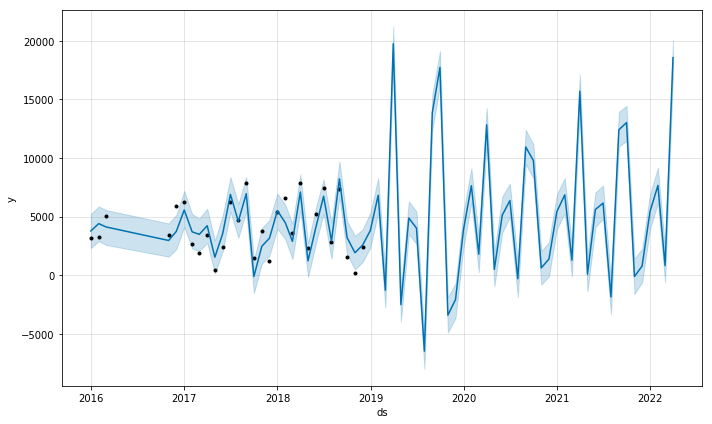

Group 2Brand 1Product Category 1Product 2Gross Adds 41


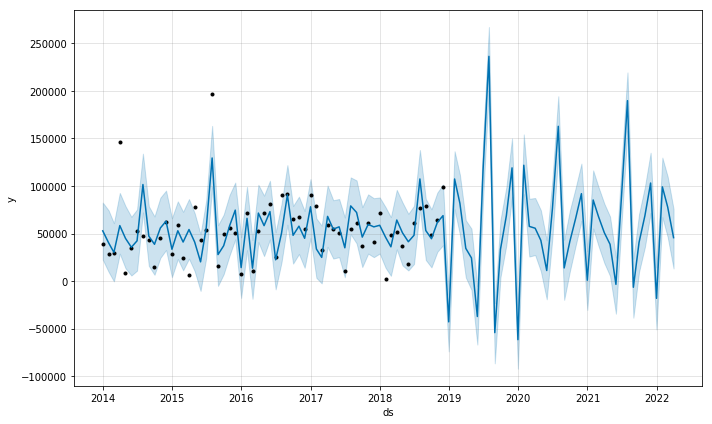

Group 2Brand 1Product Category 1Product 1.1Gross Adds 42


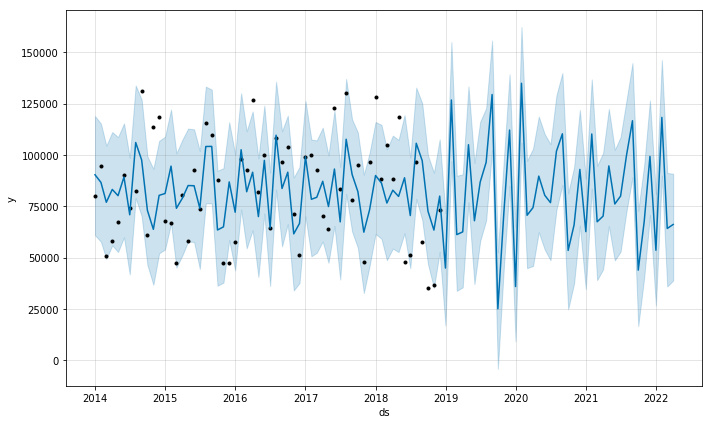

Group 2Brand 1Product Category 1Product 1.2Gross Adds 43


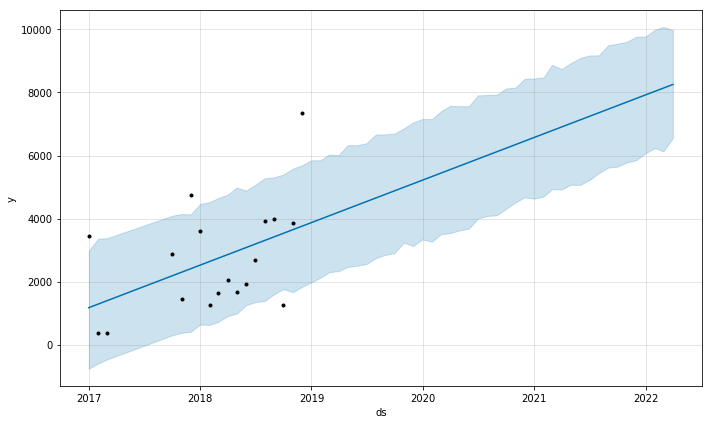

Group 2Brand 1Product Category 2Product 10Gross Adds 44


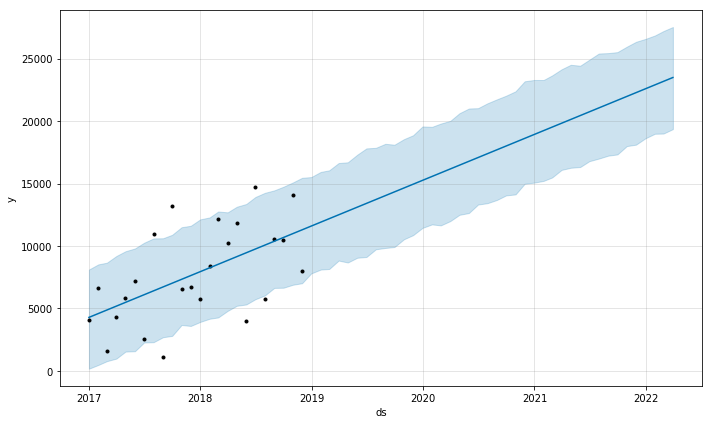

Group 2Brand 1Product Category 2Product 6Gross Adds 45


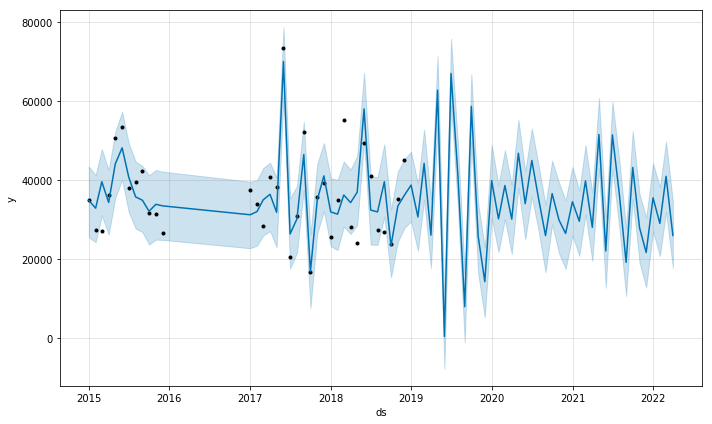

Group 5Brand 1Product Category 1Product 2Gross Adds 46


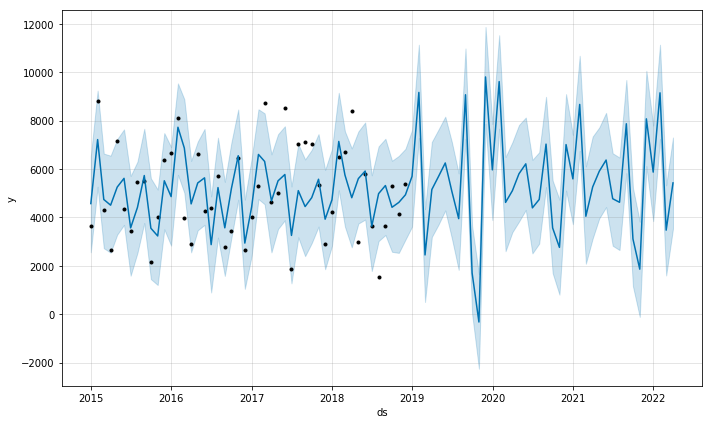

Group 5Brand 1Product Category 1Product 1.1Gross Adds 47


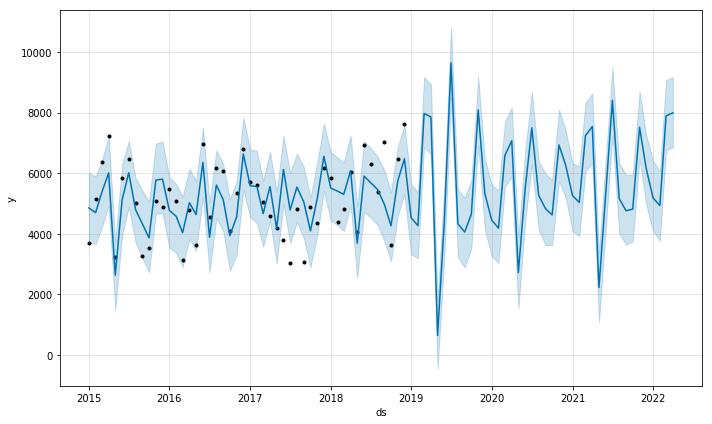

Group 5Brand 1Product Category 1Product 1.2Gross Adds 48


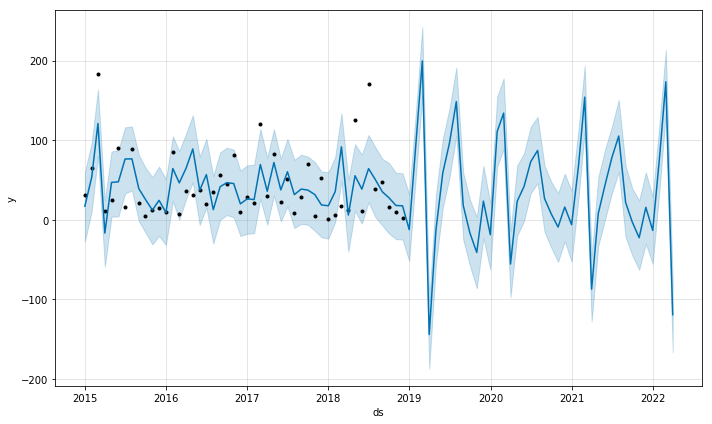

Group 2Brand 2Product Category 2Product 10Gross Adds 49


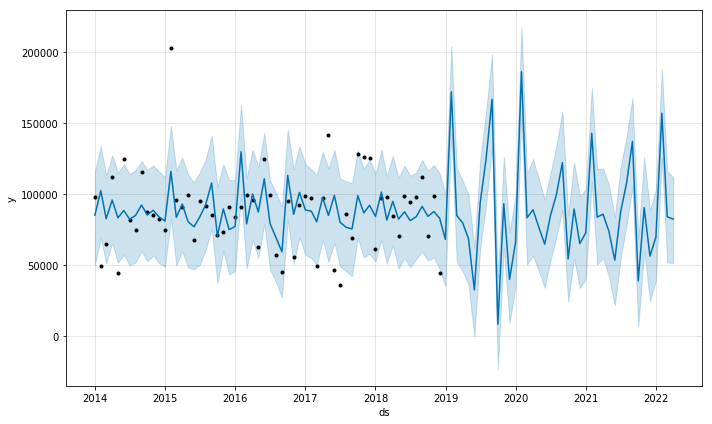

Group 2Brand 2Product Category 2Product 6Gross Adds 50


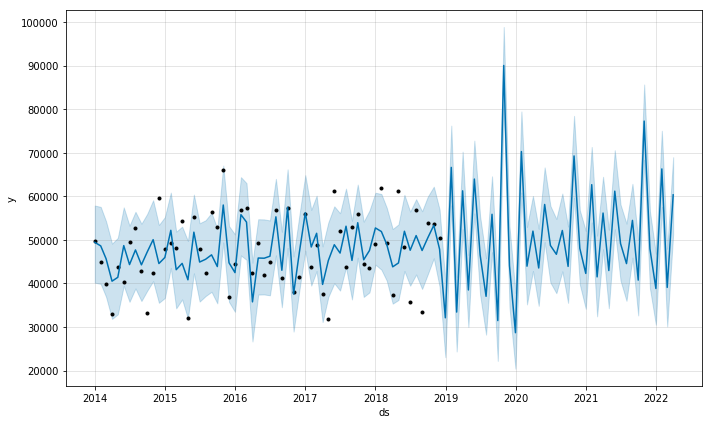

Group 5Brand 2Product Category 2Product 10Gross Adds 51


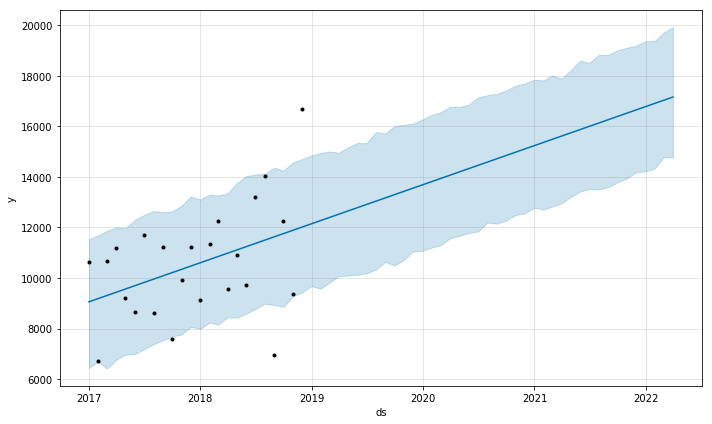

Group 5Brand 2Product Category 2Product 6Gross Adds 52


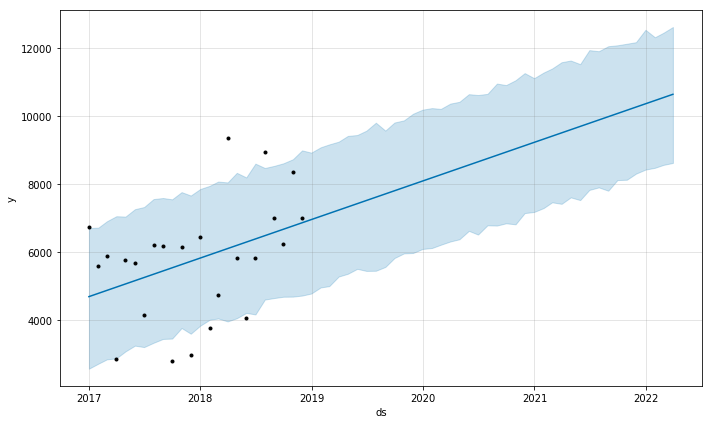

Group 2Brand 4Product Category 2Product 10Gross Adds 53


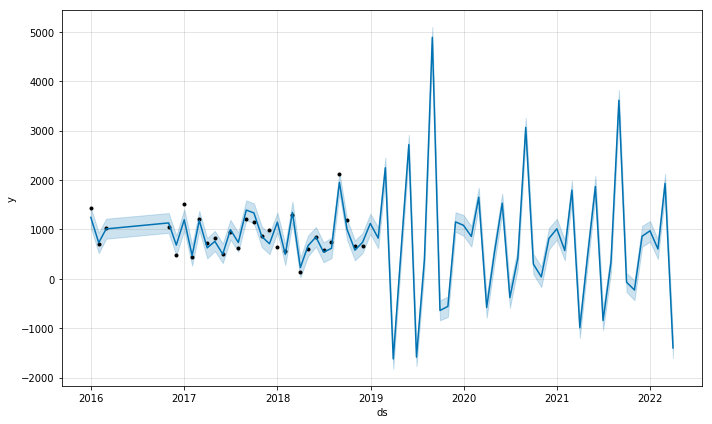

Group 2Brand 4Product Category 2Product 6Gross Adds 54


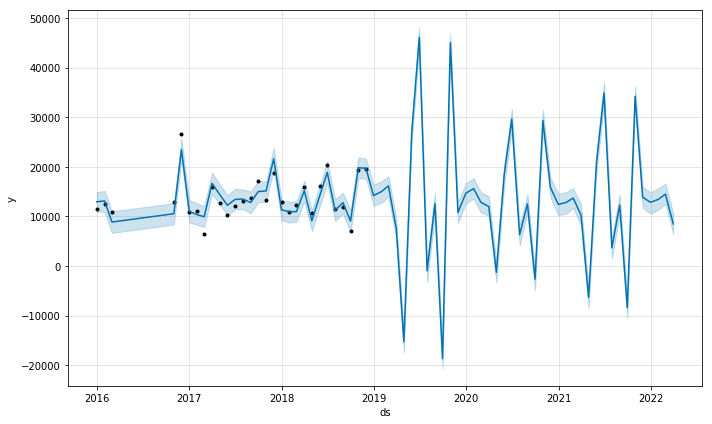

Group 2Brand 2Product Category 2Product 10Net Migrations 55


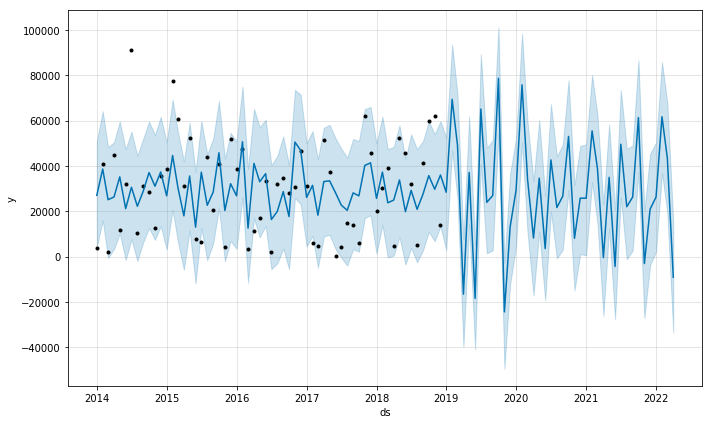

Group 2Brand 1Product Category 1Product 2Net Migrations 56


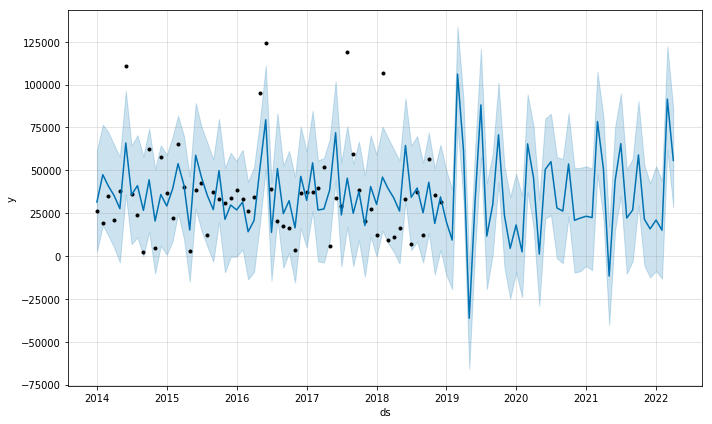

Group 2Brand 1Product Category 1Product 1.1Net Migrations 57


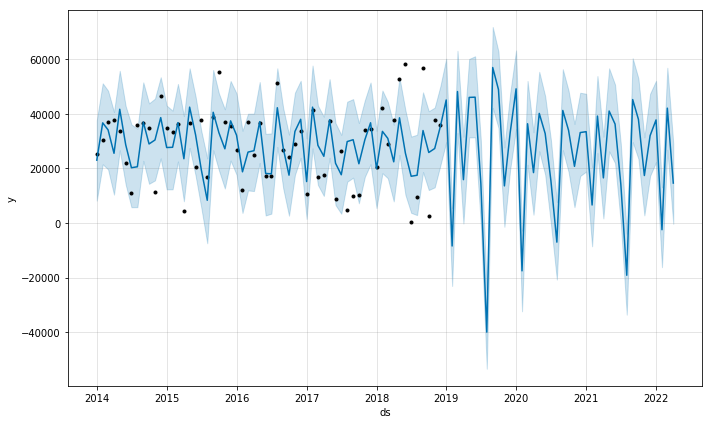

Group 2Brand 1Product Category 1Product 1.2Net Migrations 58


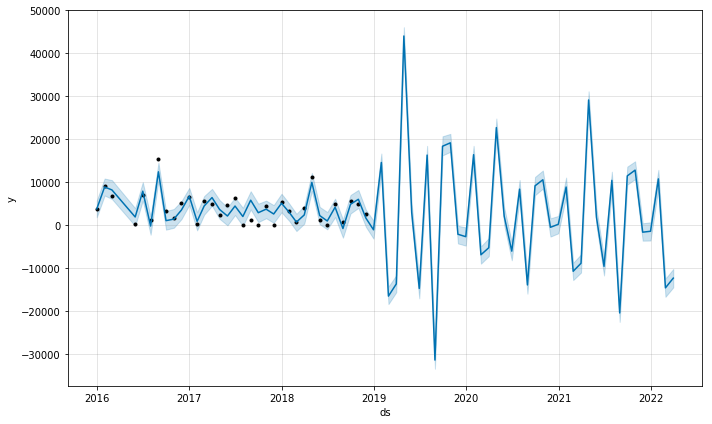

Group 2Brand 2Product Category 2Product 6Net Migrations 59


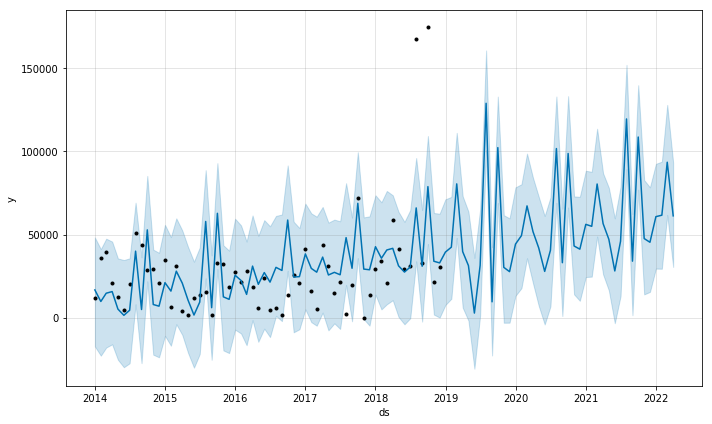

Group 2Brand 1Product Category 1Product 2Re-grade/Upsell - Product 2 to Product 2 - Volume 60


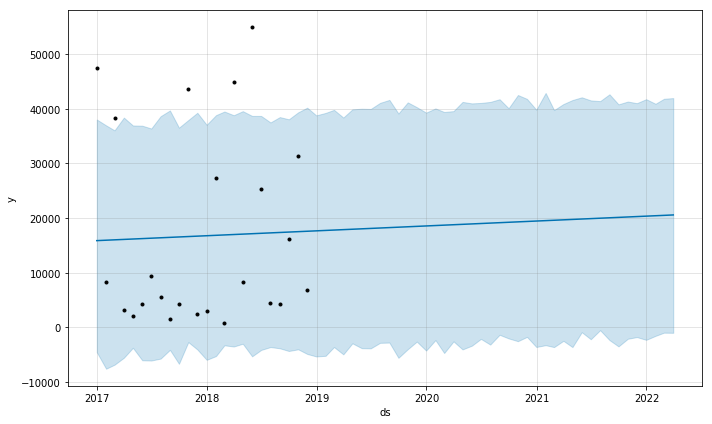

Group 2Brand 1Product Category 1Product 1.1Re-grade/Upsell - Product 1.1 to Product 1.1 - Volume 61


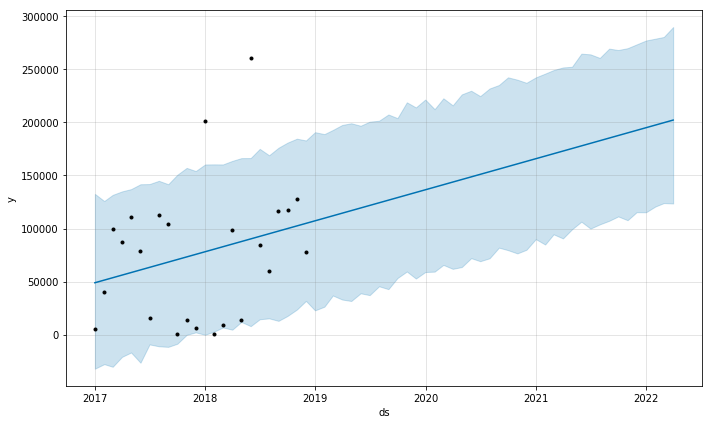

Group 2Brand 1Product Category 1Product 1.2Re-grade/Upsell - Product 1.2 to Product 1.2 - Volume 62


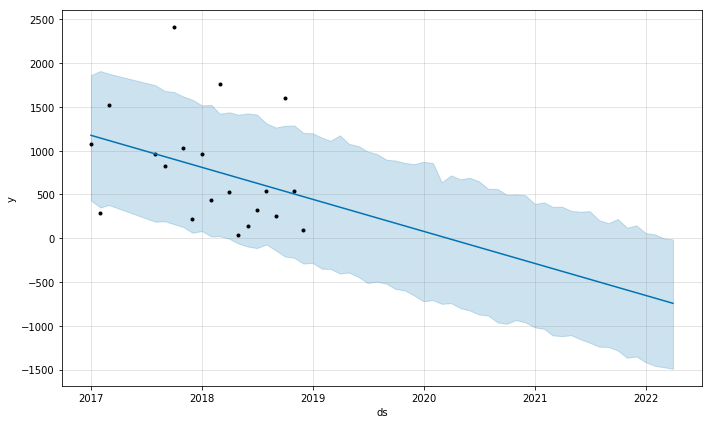

Group 2Brand 2Product Category 2Product 10Re-grade/Upsell - Product 10  to Product 10  - Volume 63


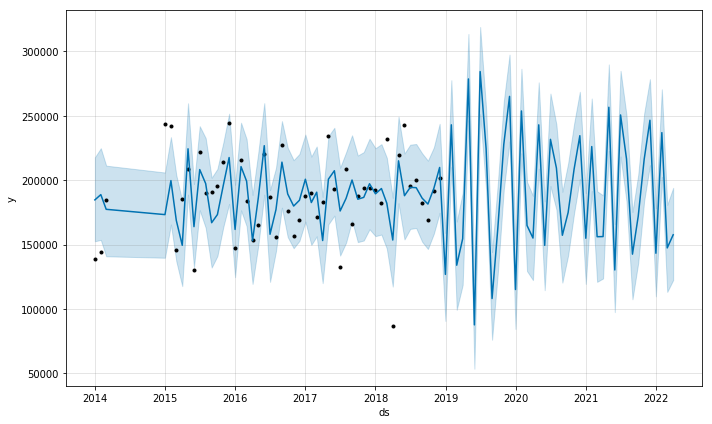

Group 2Brand 2Product Category 2Product 6Re-grade/Upsell - Product 6  to Product 6 Volume 64


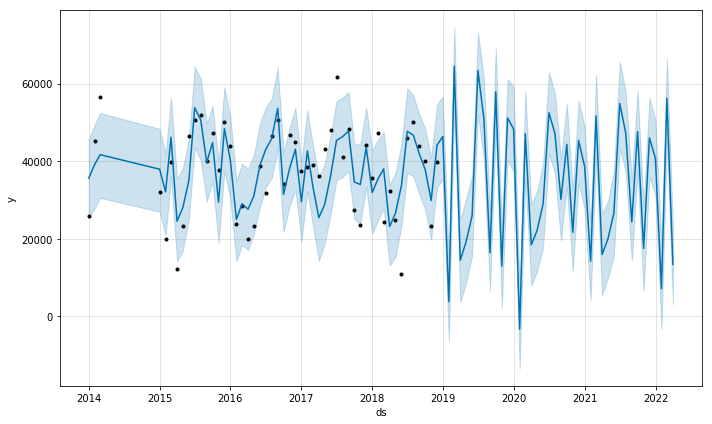

Group 5Brand 2Product Category 2Product 10Re-grade/Upsell - Total - Volume 65


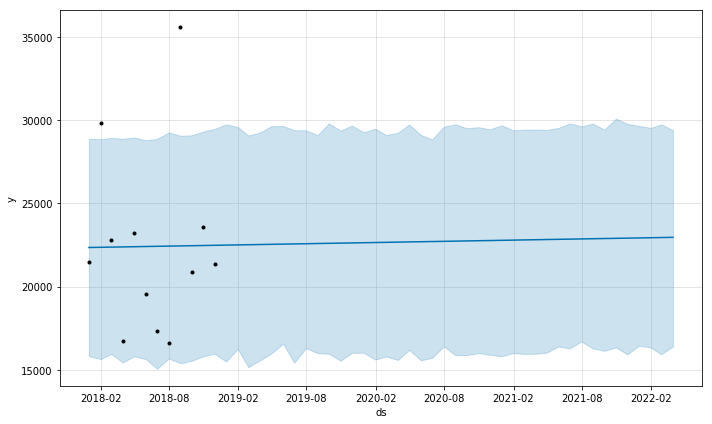

Group 5Brand 2Product Category 2Product 6Re-grade/Upsell - Total - Volume 66


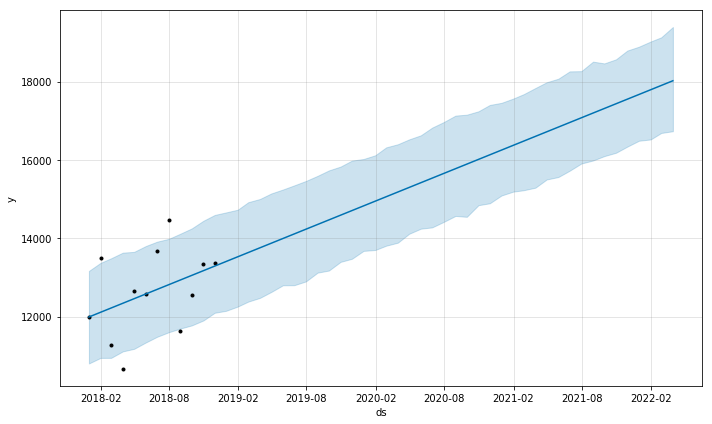

Group 2Brand 1Product Category 1Product 2Revenue 67


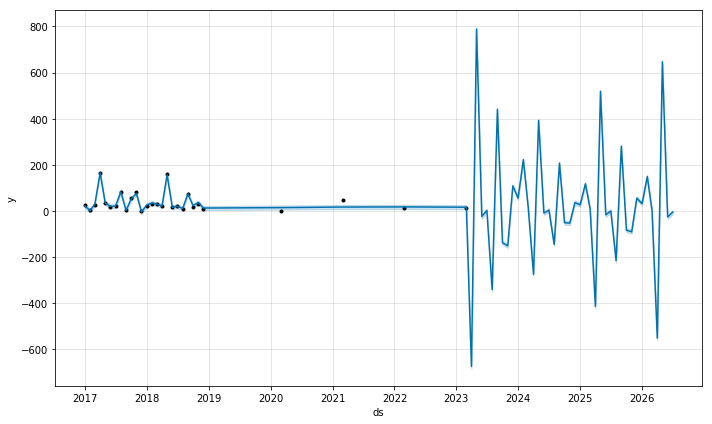

Group 2Brand 1Product Category 1Product 1.1Revenue 68


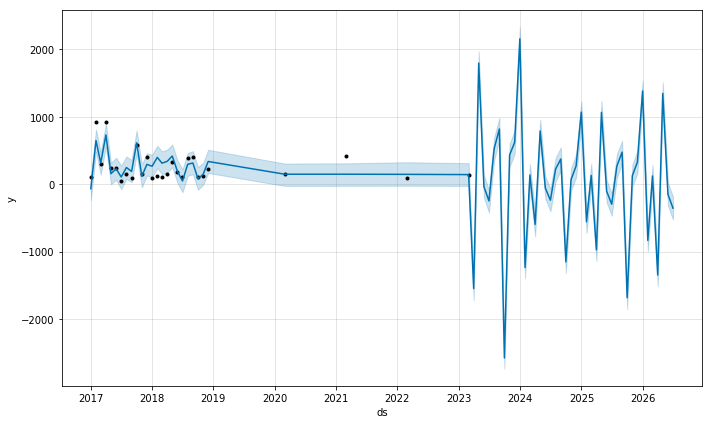

Group 2Brand 1Product Category 1Product 1.2Revenue 69


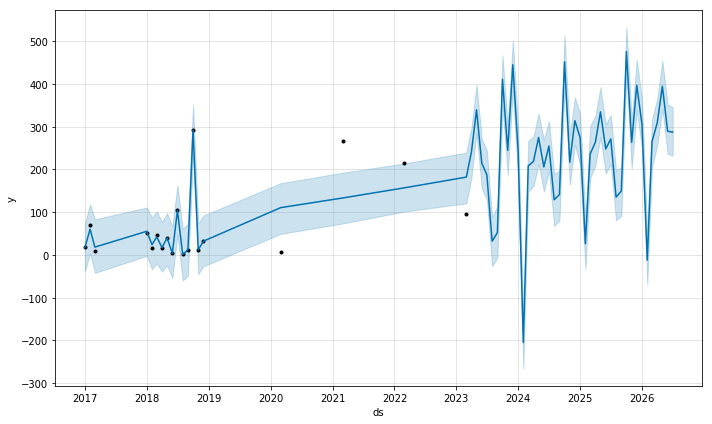

Group 2Brand 1Product Category 2Product 10Revenue 70


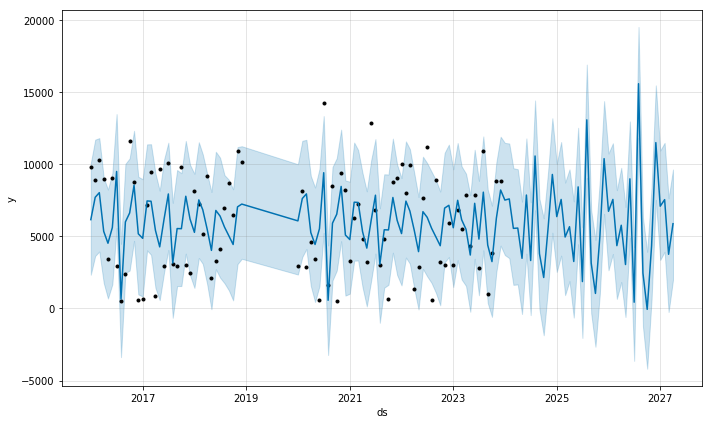

Group 2Brand 1Product Category 2Product 6Revenue 71


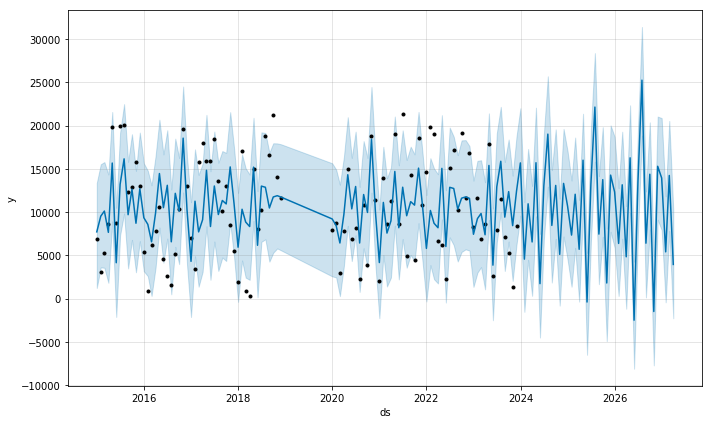

Group 2Brand 2Product Category 2Product 10Revenue 72


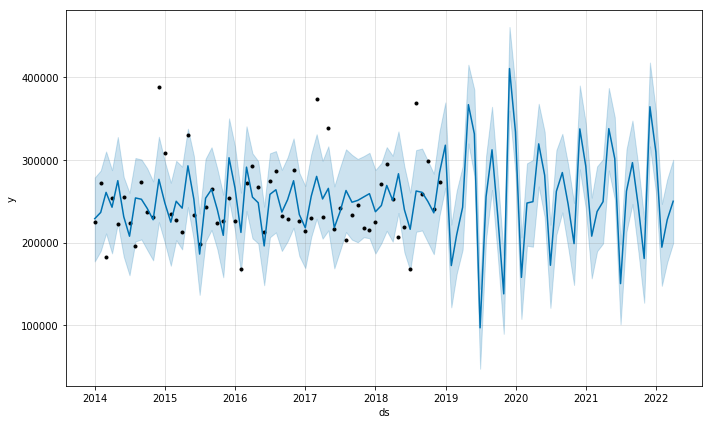

Group 5Brand 2Product Category 2Product 10Revenue 73


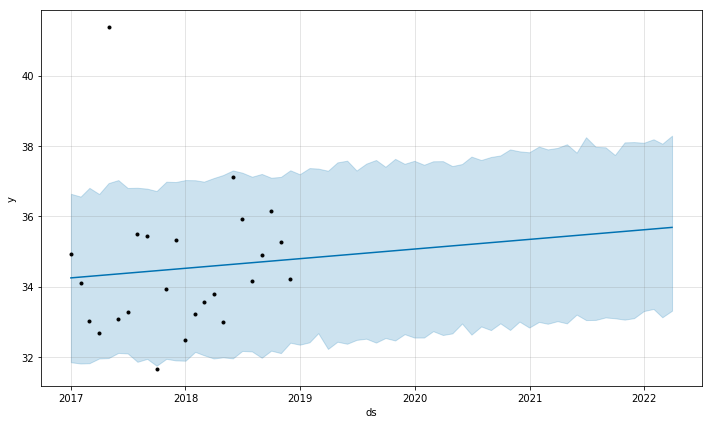

Group 2Brand 2Product Category 2Product 6Revenue 74


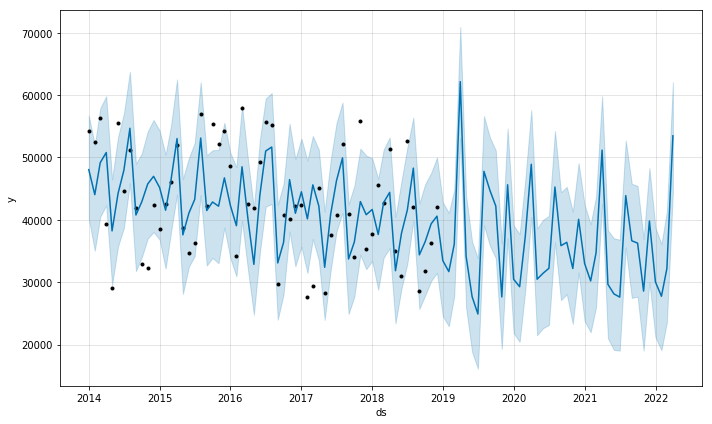

Group 4Brand 6Product Category 1Product 9Average revenue per customer 75


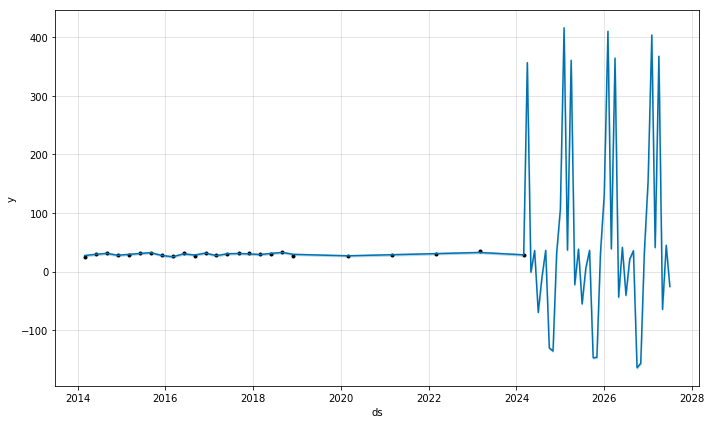

Group 4Brand 6Product Category 2Product 10Average revenue per customer 76


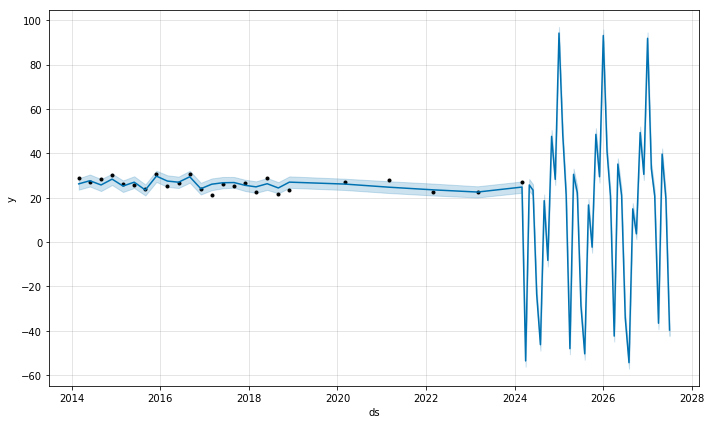

Group 4Brand 6Product Category 2Product 6Average revenue per customer 77


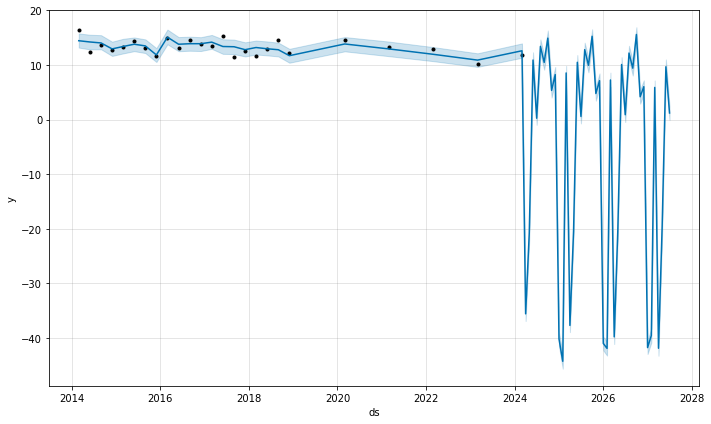

Group 6Brand 6Product Category 2Product 5Average revenue per customer 78


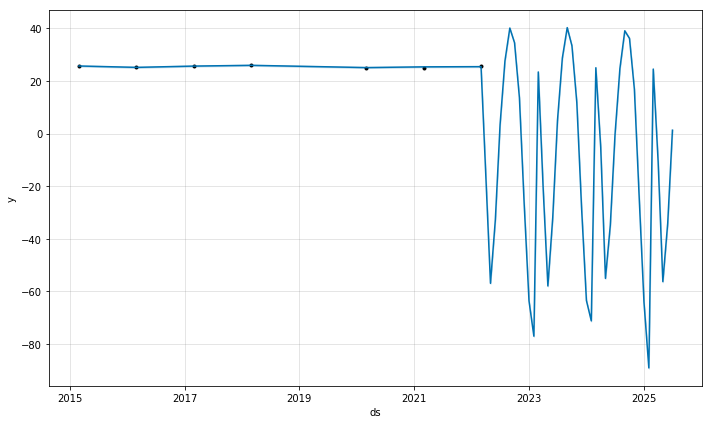

Group 6Brand 6Product Category 1Product 2Average revenue per customer 79


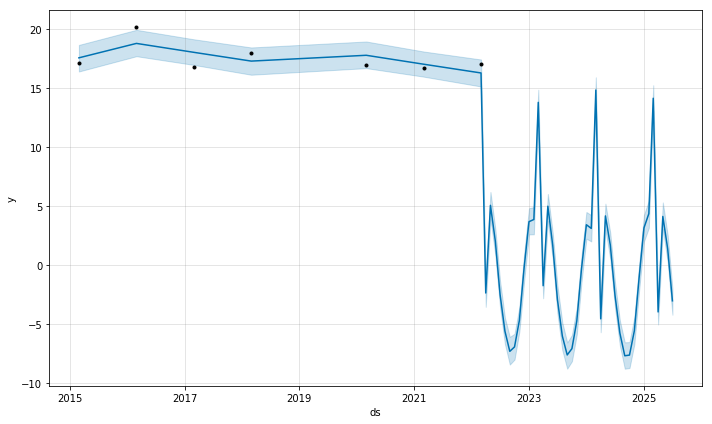

Group 6Brand 6Product Category 1Product 1.1Average revenue per customer 80


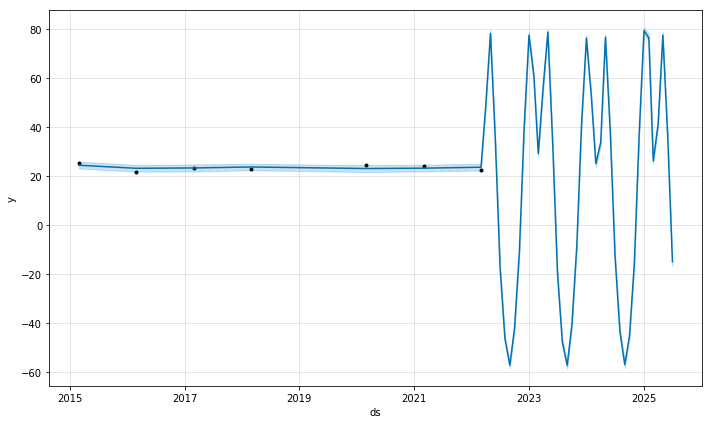

Group 6Brand 6Product Category 1Product 1.2Average revenue per customer 81


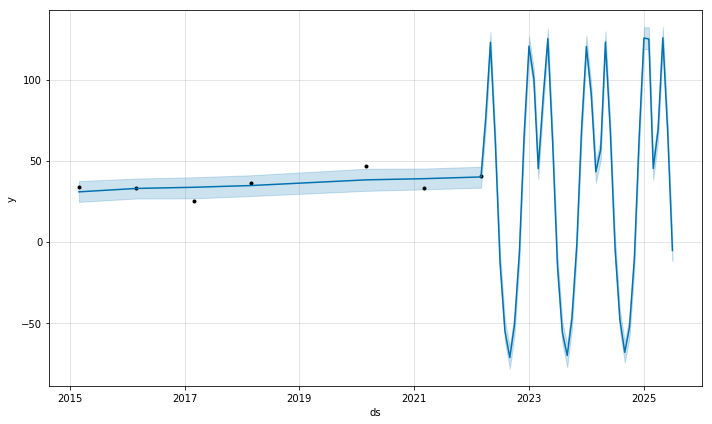

Group 6Brand 6Product Category 1Product 9Average revenue per customer 82


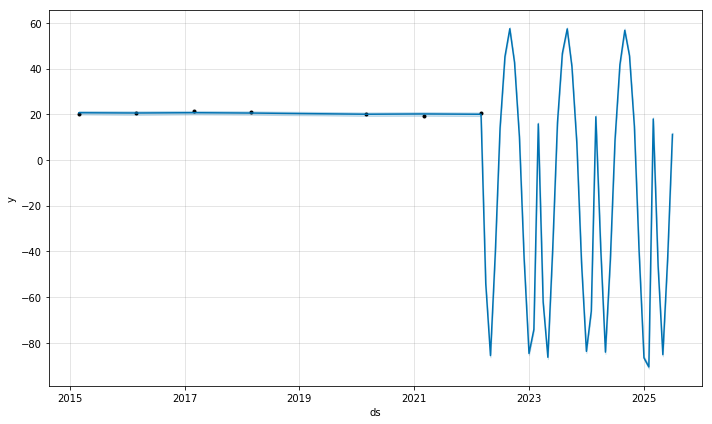

In [10]:
#Run if you wish to see the output graph for all forecasts
count =0
for i in tqdm(range(train.shape[0])):
    print (train['Generic LookupKey'].iloc[i],count)
    count+=1
    plot(train['Generic LookupKey'].iloc[i])

In [232]:
# getting the forecasts for every thing in the table

'''
input: preprocessed data
output: a dataframe with forecast date and respective forecasts with generic lookup key as header.
'''

def forecast_csv(train):
    forecast_csv = pd.DataFrame()
    for i in tqdm(range(train.shape[0])):
        lookup = train['Generic LookupKey'][i]
        df = pd.DataFrame()
        df['ds'] = [x for x in train[train['Generic LookupKey']==lookup].iloc[:,8:].columns]
        df['y'] = train[train['Generic LookupKey']==lookup].iloc[:,8:].values.tolist()[0]
        df = df.dropna()
        d = {}
        for key,val in zip(df['ds'],df['y']):
            d[key] = val
        df['ds'] = sorted(df['ds'], key=lambda d: tuple(map(int, d.split('-'))))
        df['y'] = [d[key] for key in df['ds']]
        m = Prophet()
        m.fit(df)
        future = m.make_future_dataframe(periods=60,freq='M',include_history=False)
        forecast = m.predict(future)
        forecast_csv['Date_'+lookup] = forecast['ds']
        forecast_csv[lookup] = forecast['yhat']
    return forecast_csv

In [233]:
forecast_csv = forecast_csv(train)

In [235]:
#forecast_csv.to_csv('forecasts.csv')

In [213]:
# evaluating forecasts

'''
input: preprocessed data
output: Evaluation results of all forecasts. Columns are generic lookup key,mse,rmse and mae.

'''

def evaluation_csv(train):
    evaluation_csv = pd.DataFrame()
    mae,mse,rmse,labels = [],[],[],[]
    for i in tqdm(range(train.shape[0])):
        lookup = train['Generic LookupKey'][i]
        df = pd.DataFrame()
        df['ds'] = [x for x in train[train['Generic LookupKey']==lookup].iloc[:,8:].columns]
        df['y'] = train[train['Generic LookupKey']==lookup].iloc[:,8:].values.tolist()[0]
        df = df.dropna()
        d = {}
        for key,val in zip(df['ds'],df['y']):
            d[key] = val
        df['ds'] = sorted(df['ds'], key=lambda d: tuple(map(int, d.split('-'))))
        df['y'] = [d[key] for key in df['ds']]
        df_train = df.head(round(df.shape[0]*0.8))
        df_test = df.tail(df.shape[0] - df_train.shape[0])
        m = Prophet()
        m.fit(df_train)
        future = m.make_future_dataframe(periods=40,freq='M',include_history=False)
        forecast = m.predict(future)
        predictions = forecast[['ds','yhat']].head(df_test.shape[0])['yhat']
        observations = df_test['y']
        mae.append(mean_absolute_error(predictions, observations))
        temp_mse = mean_squared_error(predictions, observations)
        temp_rmse = math.sqrt(temp_mse)
        mse.append(temp_mse)
        rmse.append(temp_rmse)
        labels.append(lookup)
    evaluation_csv['lookup_key'] = labels
    evaluation_csv['rmse'] = rmse
    evaluation_csv['mse'] = mse
    evaluation_csv['mae'] = mae
    return evaluation_csv

In [214]:
eval_results = evaluation_csv(train)